In [15]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
file_path = "Data\winequality-red.csv"  # Update if needed
df = pd.read_csv(file_path)

<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Saian\AppData\Local\Temp\ipykernel_14464\1186338799.py:2: SyntaxWarning: invalid escape sequence '\w'
  file_path = "Data\winequality-red.csv"  # Update if needed


In [4]:
# Define the two groups: higher quality and lower quality
# Higher quality is >=6 and lower quality is <=5
group_6 = df[df['quality'] >= 6]['alcohol'].dropna()
group_5 = df[df['quality'] <= 5]['alcohol'].dropna()

In [5]:
# Perform an independent samples t-test (Welch's t-test, assumes unequal variances)
t_stat, p_value = stats.ttest_ind(group_6, group_5, equal_var=False)

# Compute 95% Confidence Interval for the difference in means
mean_diff = np.mean(group_6) - np.mean(group_5)
se_diff = np.sqrt(np.var(group_6, ddof=1)/len(group_6) + np.var(group_5, ddof=1)/len(group_5))
ci_lower = mean_diff - 1.96 * se_diff  # 95% CI lower bound
ci_upper = mean_diff + 1.96 * se_diff  # 95% CI upper bound

# Display results
print("\nTwo-Sample t-Test (Welch's) Results:")
print(f"Null Hypothesis (H₀): Mean alcohol content for quality 6 and 5 is equal")
print(f"Alternative Hypothesis (H₁): Mean alcohol content is different between quality 6 and 5")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Mean Difference: {mean_diff:.4f}")
print(f"95% Confidence Interval: ({ci_lower:.4f}, {ci_upper:.4f})")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("\nConclusion: Reject the null hypothesis (H₀). There is a significant difference in alcohol content between wines of quality 6 and 5.")
else:
    print("\nConclusion: Fail to reject the null hypothesis (H₀). There is no significant difference in alcohol content between wines of quality 6 and 5.")


Two-Sample t-Test (Welch's) Results:
Null Hypothesis (H₀): Mean alcohol content for quality 6 and 5 is equal
Alternative Hypothesis (H₁): Mean alcohol content is different between quality 6 and 5
t-statistic: 19.7822
p-value: 0.0000
Mean Difference: 0.9286
95% Confidence Interval: (0.8366, 1.0206)

Conclusion: Reject the null hypothesis (H₀). There is a significant difference in alcohol content between wines of quality 6 and 5.


In [7]:
# Define the two groups: higher quality and lower quality
# Higher quality is >=6 and lower quality is <=5
high_quality = df[df['quality'] >= 6]['alcohol'].dropna()
low_quality = df[df['quality'] <= 5]['alcohol'].dropna()


In [13]:

# Count how many of each
nHighQuality = high_quality.count()
print(f"Entries in High Quality Group: {nHighQuality}")
nLowQuality = low_quality.count()
print(f"Entries in Low Quality Group: {nLowQuality}")

Entries in High Quality Group: 855
Entries in Low Quality Group: 744


C:\Users\Saian\AppData\Local\Temp\ipykernel_14464\724829446.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([high_quality, low_quality], labels=["High Quality", "Low Quality"])


Text(0, 0.5, 'Alcohol Content (%)')

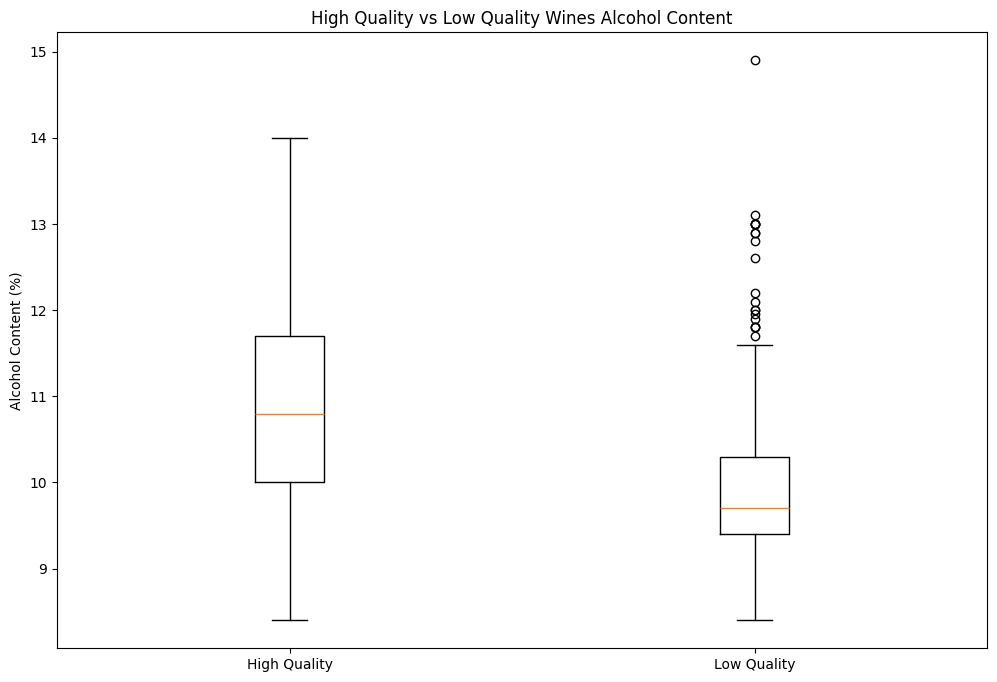

In [16]:
# Compare groups - box plots

labels = np.array(["High Quality"]*nHighQuality + ["Low Quality"]*nLowQuality)
combinedGroups = np.concatenate([high_quality, low_quality])

# Draw the box plot
plt.figure(figsize=(12,8))
plt.boxplot([high_quality, low_quality], labels=["High Quality", "Low Quality"])
plt.title("High Quality vs Low Quality Wines Alcohol Content")
plt.ylabel("Alcohol Content (%)")


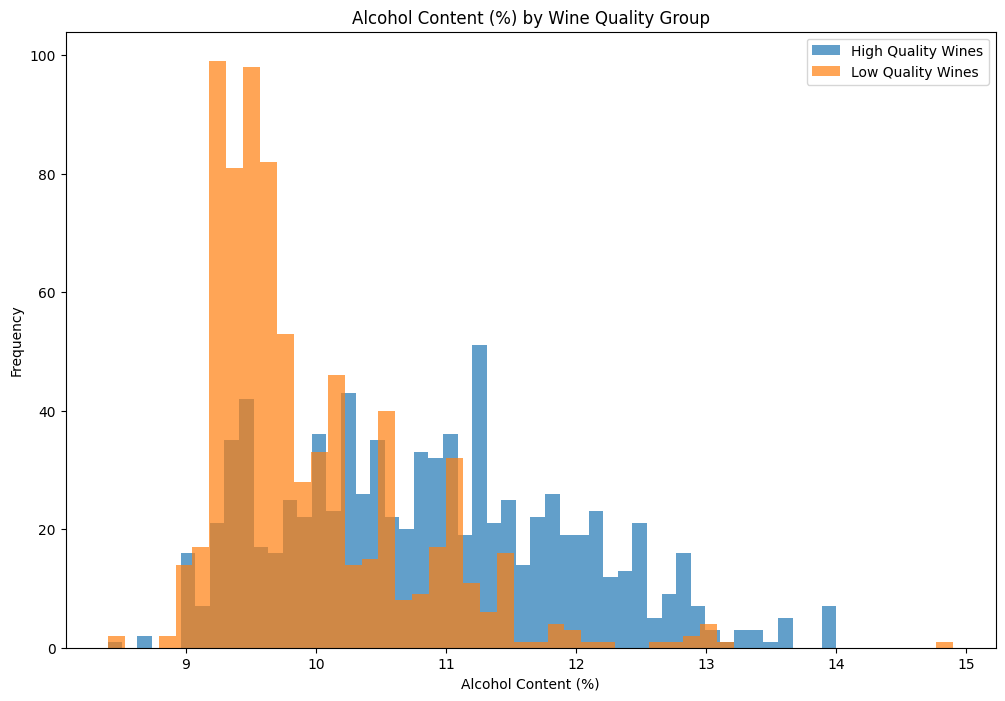

In [ ]:
# Compare groups - Histogram
plt.figure(figsize=(12,8))
plt.hist(high_quality, bins=24, alpha=0.7, label="High Quality Wines")
plt.hist(low_quality, bins=24, alpha=0.7, label="Low Quality Wines")
plt.title("Alcohol Content (%) by Wine Quality Group")
plt.xlabel("Alcohol Content (%)")
plt.ylabel("Frequency")
plt.legend()

In [17]:
# Perform a Two-Sample t-test (independent)
t_stat, p_value = stats.ttest_ind(high_quality, low_quality, equal_var=True)

# Display the results
print("Two-Sample t-test (Alcohol Content between high and low quality wines)")
print("t_stat = ", t_stat)
print("p_value = ", p_value)

# Check against the significance level
alpha = 0.05
if p_value < alpha:
    print("\nConclusion: Reject the null hypothesis (H₀). There is a significant difference in alcohol content between high and low quality wines.")
else:
    print("\nConclusion: Fail to reject the null hypothesis (H₀). There is no significant difference in alcohol content between high and low quality wines.")

Two-Sample t-test (Alcohol Content between high and low quality wines)
t_stat =  19.292349918694175
p_value =  1.0239802386368774e-74

Conclusion: Reject the null hypothesis (H₀). There is a significant difference in alcohol content between high and low quality wines.
